# Internship number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('termdeposit_train.csv')
df_test = pd.read_csv('termdeposit_test.csv')

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='pdays', ylabel='Density'>

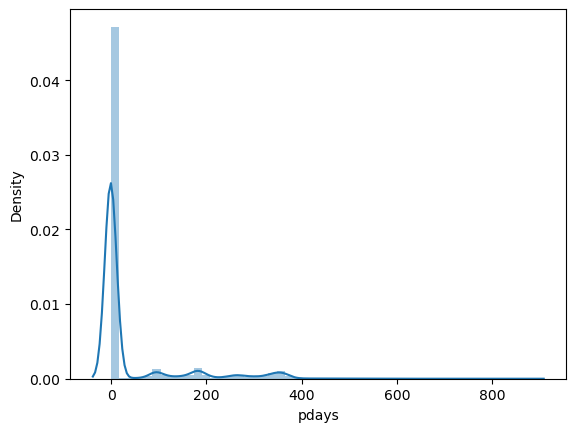

In [6]:
sns.distplot(df['pdays'])

<AxesSubplot:xlabel='count', ylabel='job'>

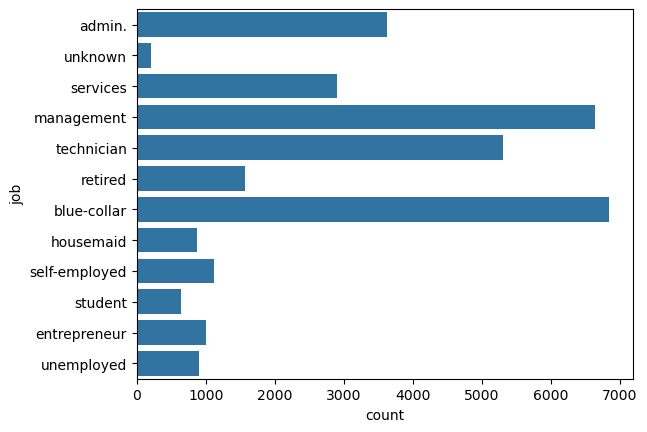

In [7]:
sns.countplot(df['job'])

<AxesSubplot:xlabel='marital', ylabel='count'>

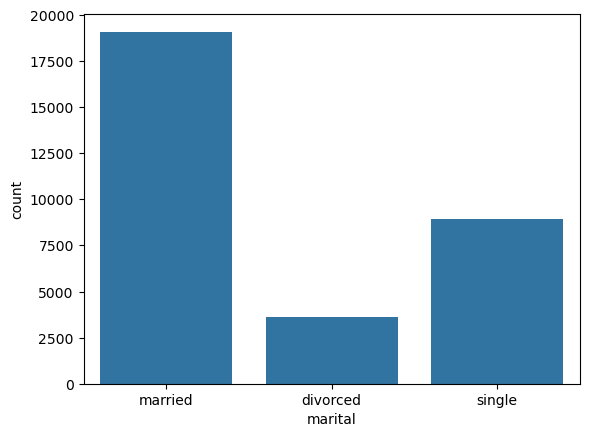

In [8]:
sns.countplot(x=df['marital'])

<AxesSubplot:xlabel='count', ylabel='education'>

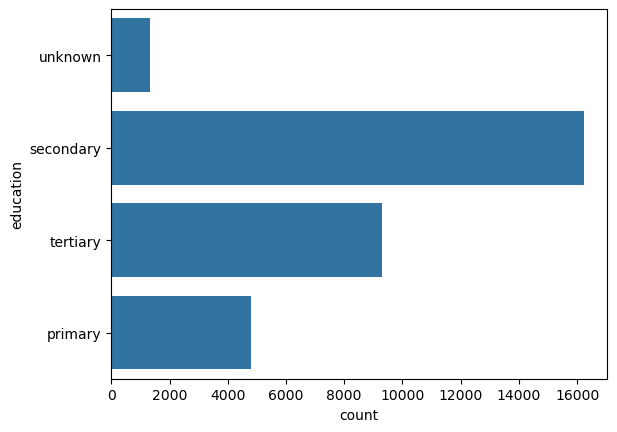

In [9]:
sns.countplot(df['education'])

<AxesSubplot:xlabel='count', ylabel='contact'>

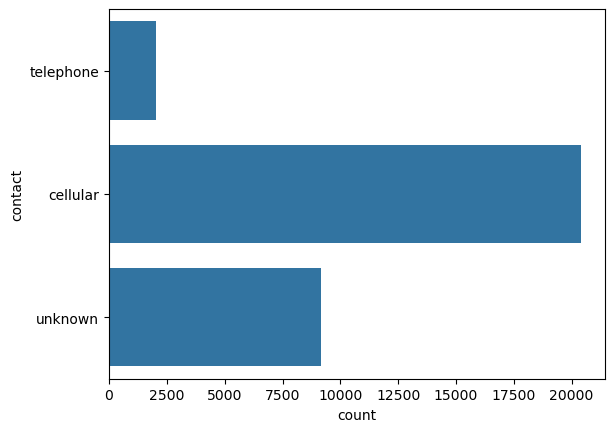

In [10]:
sns.countplot(df['contact'])

<AxesSubplot:xlabel='subscribed', ylabel='count'>

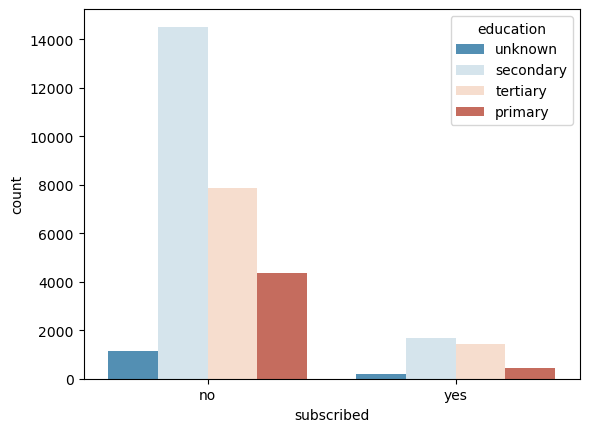

In [11]:
sns.countplot(x='subscribed',hue='education',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

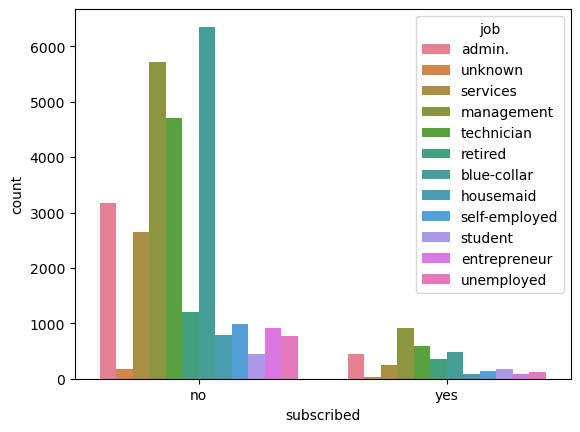

In [12]:
sns.countplot(x='subscribed',hue='job',data=df)

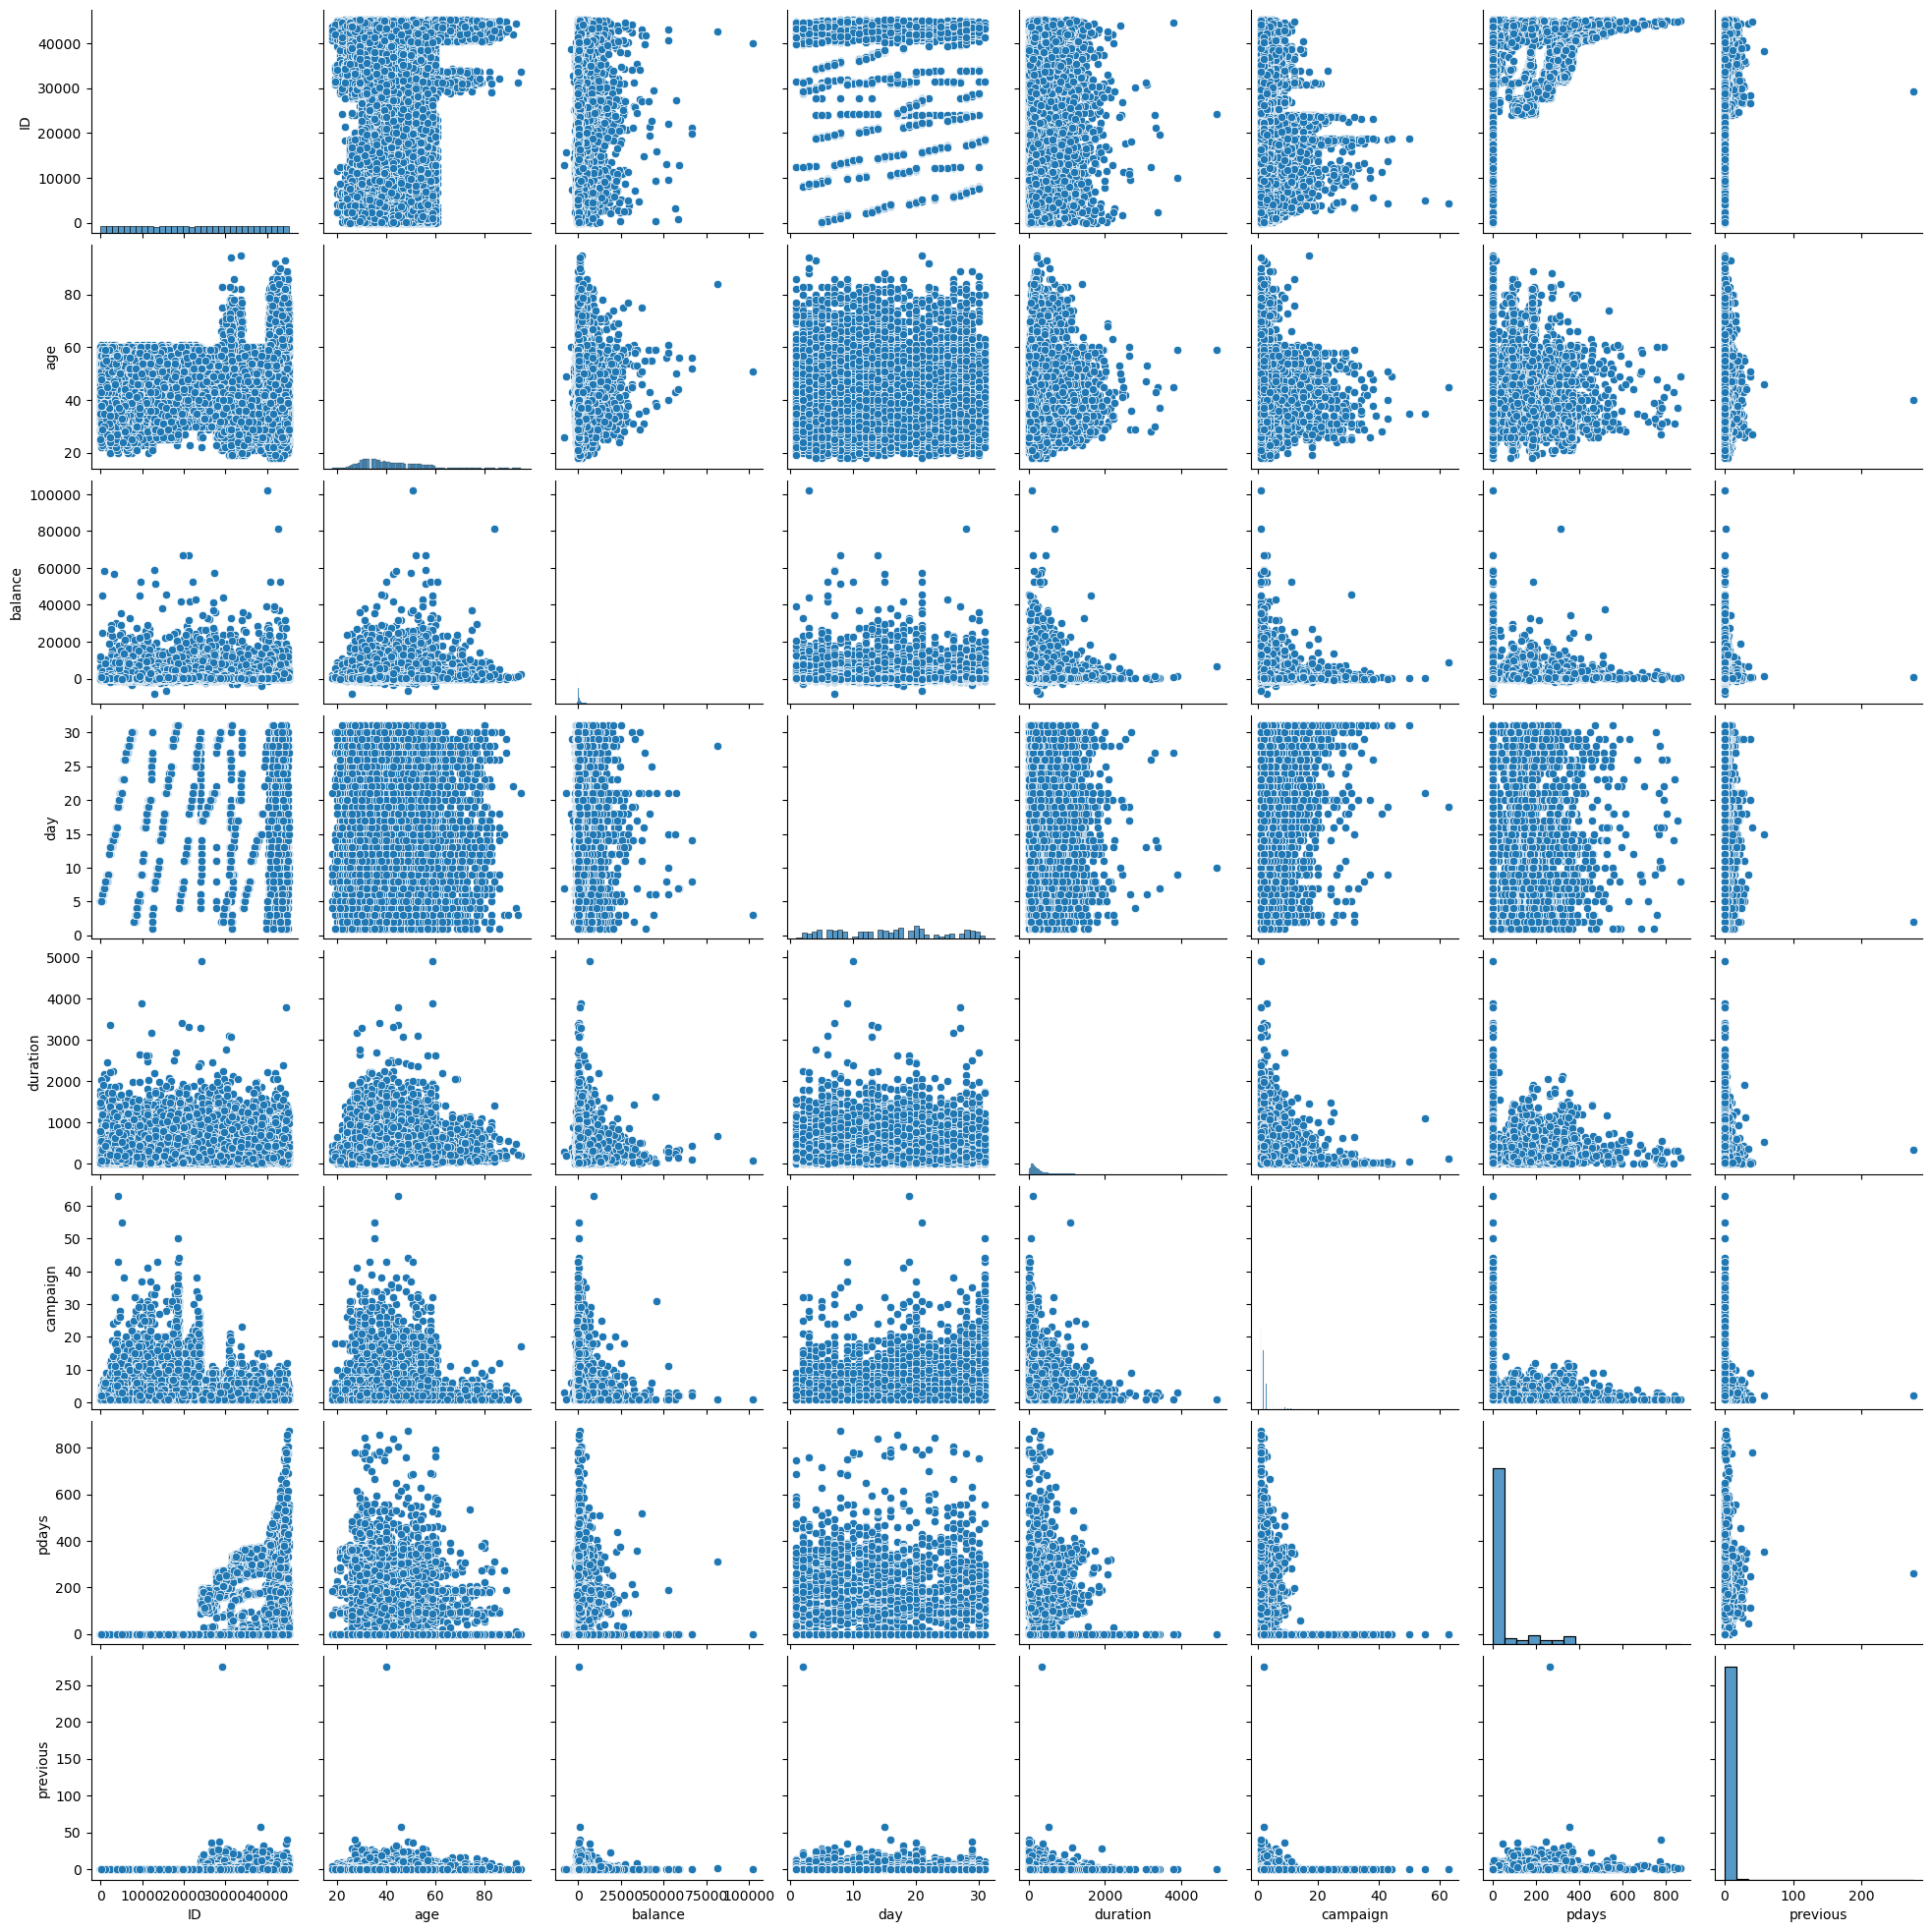

In [13]:
sns.pairplot(df)

<AxesSubplot:>

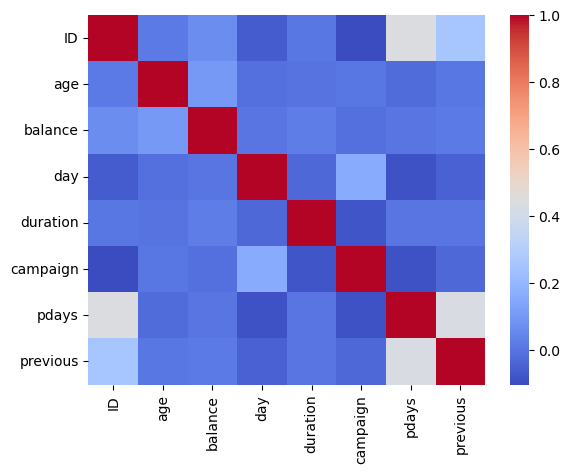

In [14]:
sns.heatmap(df.corr(),cmap='coolwarm')

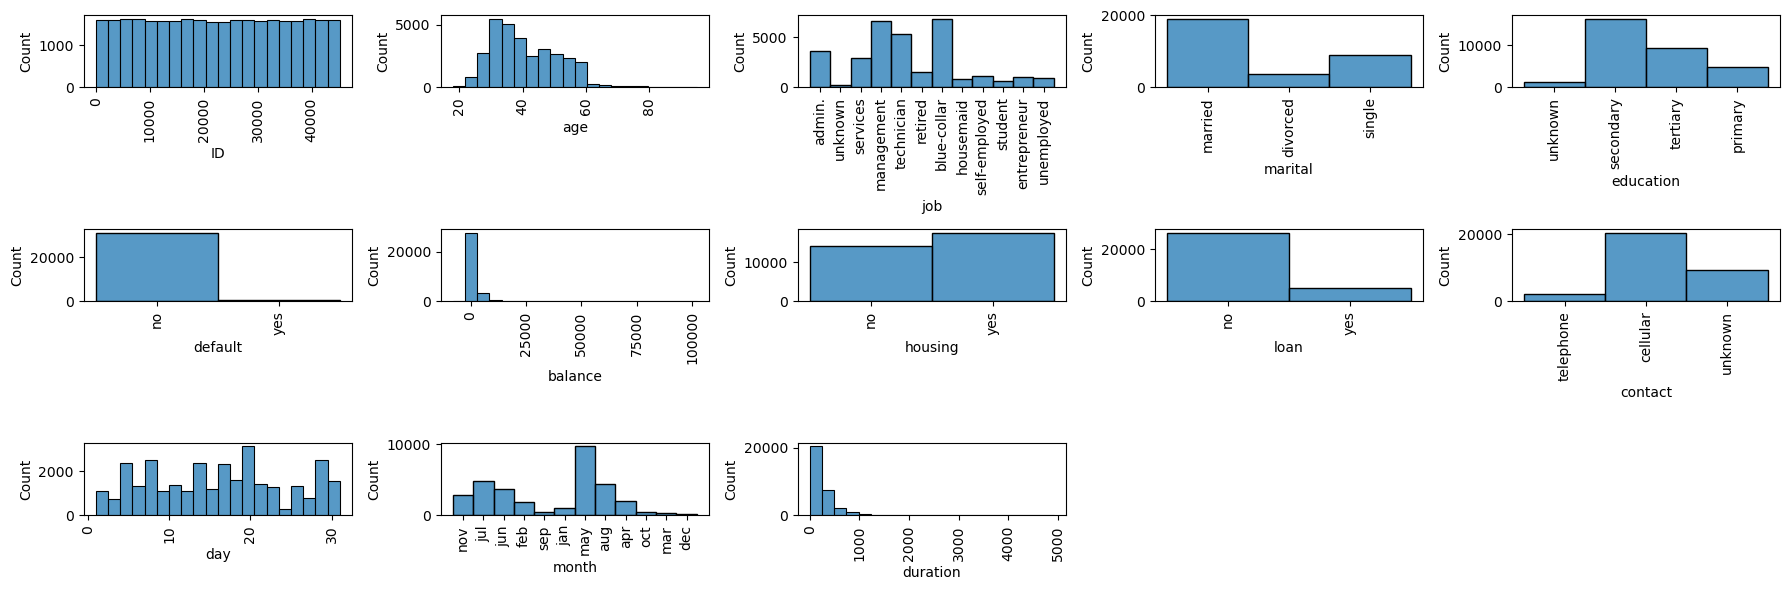

In [15]:
plt.figure(figsize=(18,6))
p = 1
for i in df.columns:
    if p<=13:
        plt.subplot(3,5,p)
        sns.histplot(df[i], bins=20)
        plt.xlabel(i)
        plt.xticks(rotation=90)
    p += 1
plt.tight_layout()
plt.show()

In [16]:
df.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

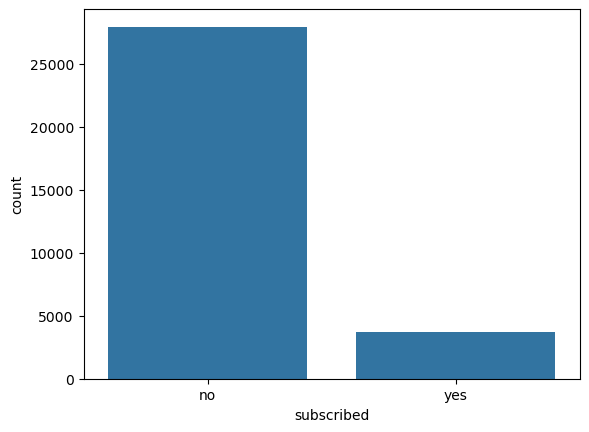

In [17]:
sns.countplot(x=df['subscribed'])

In [18]:
df.drop(['ID'],axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1
31644,14,4,2,2,0,1131,0,0,0,6,1,36,2,0,0,3,0
31645,39,9,1,1,0,1044,1,0,1,14,8,21,6,332,12,0,0


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
x = df.drop(['subscribed'],axis=1)
y = df.subscribed

In [23]:
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [24]:
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['fea'] = x1.columns

vif

,vif,fea
0,5.682622,age
1,3.109404,job
2,4.469623,marital
3,3.763330,education
4,1.030350,default
5,3.102742,balance
6,1.950163,housing
7,1.157371,loan
8,1.718073,contact
9,4.243078,day


In [26]:
x_new = x1.drop(['poutcome'],axis=1)

In [27]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['fea'] = x_new.columns

vif

,vif,fea
0,4.475534,age
1,3.030371,job
2,3.841938,marital
3,3.603212,education
4,1.029272,default
5,3.091225,balance
6,1.909630,housing
7,1.154702,loan
8,1.707830,contact
9,4.025857,day


In [28]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
lr = LogisticRegression() 
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rc = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y1, test_size=0.33, random_state=42)

In [33]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7961054458667823
--------------------------------------------------
[[7349 1911]
 [1848 7328]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.80      0.79      0.80      9260
           1       0.79      0.80      0.80      9176

    accuracy                           0.80     18436
   macro avg       0.80      0.80      0.80     18436
weighted avg       0.80      0.80      0.80     18436

--------------------------------------------------
Score_train: 0.7995083894410602


In [34]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8895638967238012
--------------------------------------------------
[[8155 1105]
 [ 931 8245]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89      9260
           1       0.88      0.90      0.89      9176

    accuracy                           0.89     18436
   macro avg       0.89      0.89      0.89     18436
weighted avg       0.89      0.89      0.89     18436

--------------------------------------------------
Score_train: 1.0


In [35]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred_train = kn.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8640702972445216
--------------------------------------------------
[[7159 2101]
 [ 405 8771]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.95      0.77      0.85      9260
           1       0.81      0.96      0.88      9176

    accuracy                           0.86     18436
   macro avg       0.88      0.86      0.86     18436
weighted avg       0.88      0.86      0.86     18436

--------------------------------------------------
Score_train: 0.9013572726301164


In [36]:
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.9264482534172271
--------------------------------------------------
[[8392  868]
 [ 488 8688]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9260
           1       0.91      0.95      0.93      9176

    accuracy                           0.93     18436
   macro avg       0.93      0.93      0.93     18436
weighted avg       0.93      0.93      0.93     18436

--------------------------------------------------
Score_train: 1.0


In [37]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8903232805380776
--------------------------------------------------
[[8009 1251]
 [ 771 8405]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.91      0.86      0.89      9260
           1       0.87      0.92      0.89      9176

    accuracy                           0.89     18436
   macro avg       0.89      0.89      0.89     18436
weighted avg       0.89      0.89      0.89     18436

--------------------------------------------------
Score_train: 0.8959869616330021


In [38]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7387177261878932
--------------------------------------------------
[[7128 2132]
 [2685 6491]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.73      0.77      0.75      9260
           1       0.75      0.71      0.73      9176

    accuracy                           0.74     18436
   macro avg       0.74      0.74      0.74     18436
weighted avg       0.74      0.74      0.74     18436

--------------------------------------------------
Score_train: 0.7448701506893235


In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('*'*50)
print('Log reg:',lr_score.mean())

[0.88751975 0.89194313 0.88973144 0.8821485  0.8764613  0.88025276
 0.88278041 0.88969659 0.88305942 0.88337547]
**************************************************
Log reg: 0.8846968761920738


In [41]:
dt_score = cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('*'*50)
print('Decision Tree:',dt_score.mean())

[0.87298578 0.87488152 0.87772512 0.87519747 0.86635071 0.87488152
 0.87835703 0.8789507  0.86883692 0.87452592]
**************************************************
Decision Tree: 0.8742692674100215


In [42]:
kn_score = cross_val_score(kn,x,y,cv=10)
print(kn_score)
print('*'*50)
print('KNN:',kn_score.mean())

[0.87424961 0.88341232 0.88720379 0.87898894 0.87330174 0.88309637
 0.88183254 0.8874842  0.88400759 0.87989886]
**************************************************
KNN: 0.881347595281035


In [43]:
gb_score = cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('*'*50)
print('Grad Boost:',gb_score.mean())

[0.8985782  0.91058452 0.90774092 0.907109   0.89605055 0.90616114
 0.89699842 0.90834387 0.89949431 0.90297092]
**************************************************
Grad Boost: 0.9034031851217188


In [44]:
rc_score = cross_val_score(rc,x,y,cv=10)
print(rc_score)
print('*'*50)
print('Random Forest:',rc_score.mean())

[0.90268562 0.90868878 0.91248025 0.90552923 0.89984202 0.90552923
 0.89952607 0.90802781 0.90328698 0.90265487]
**************************************************
Random Forest: 0.9048250859291835


In [45]:
svm_score = cross_val_score(svm,x,y,cv=10)
print(svm_score)
print('*'*50)
print('SVM',svm_score.mean())

[0.88341232 0.88341232 0.88341232 0.88278041 0.88341232 0.8849921
 0.88025276 0.88242731 0.88495575 0.88432364]
**************************************************
SVM 0.883338126594009


In [58]:
params = {'n_estimators':[13,15],'criterion':['entropy','gini'],'max_depth':[10,15],'min_samples_split':[10,11],'min_samples_leaf':[5,6]}

In [59]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rc, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [63]:
best_params

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [64]:
model = grid_search.best_estimator_
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [65]:
model.score(x_test, y_test)

0.9046430896072901

In [66]:
import pickle
import joblib

In [68]:
file = 'Term_deposit.pkl'
pickle.dump(model, open(file,'wb'))

In [71]:
loaded_model = pickle.load(open('Term_deposit.pkl','rb'))
result = loaded_model.score(x_test,y_test)
result*100

90.46430896072901

In [72]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['pred','actual'])

In [77]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,18426,18427,18428,18429,18430,18431,18432,18433,18434,18435
pred,1,1,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
actual,1,1,1,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [88]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [80]:
df_test.duplicated().sum()

0

In [85]:
df_test.drop(['ID'],axis=1,inplace=True)

<AxesSubplot:>

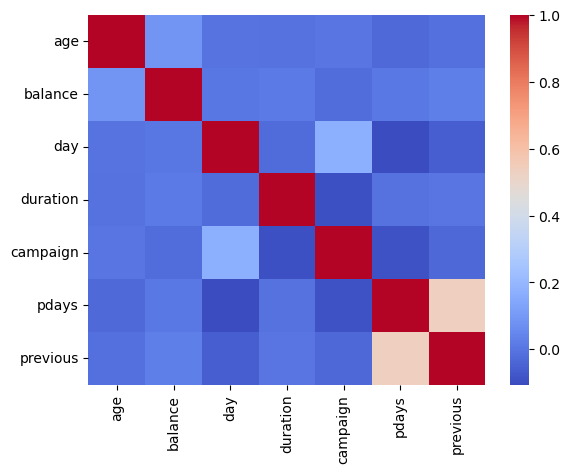

In [86]:
sns.heatmap(df_test.corr(),cmap='coolwarm')

In [89]:
le = LabelEncoder()
for i in df_test.columns:
    df_test[i] = le.fit_transform(df_test[i])

In [90]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,14,7,1,1,0,682,1,0,0,14,8,19,5,0,0,3
1,60,5,0,0,0,2809,0,0,1,0,5,371,0,0,0,3
2,13,6,2,2,0,708,1,0,2,15,8,673,0,0,0,3
3,39,7,2,0,0,3226,1,0,1,12,8,64,1,0,0,3
4,27,1,0,1,0,94,0,1,2,2,5,110,0,0,0,3


In [91]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_test,i) for i in range(df_test.shape[1])]
vif['fea'] = df_test.columns

vif

,vif,fea
0,5.745803,age
1,2.831815,job
2,4.912521,marital
3,3.751872,education
4,1.034858,default
5,3.020534,balance
6,2.575071,housing
7,1.208115,loan
8,1.964490,contact
9,4.180672,day


In [92]:
x_test_new = df_test.drop(['poutcome'],axis=1)

In [94]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_test_new,i) for i in range(x_test_new.shape[1])]
vif['fea'] = x_test_new.columns

vif

,vif,fea
0,4.398971,age
1,2.750464,job
2,4.065410,marital
3,3.602003,education
4,1.033481,default
5,2.999780,balance
6,2.488058,housing
7,1.194580,loan
8,1.932239,contact
9,3.969099,day


In [95]:
y_test_pred = loaded_model.predict(x_test_new)

In [97]:
y_test_pred

array([0, 1, 0, ..., 0, 1, 0])